# Task 1

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("Dataset .csv")

In [3]:
data['Has Table Booking'] = data['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Has Online Delivery'] = data['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Switch to order menu'] = data['Switch to order menu'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Is delivering now'] = data['Is delivering now'].apply(lambda x: 1 if x == 'Yes' else 0)

In [4]:
X = data[['Latitude', 'Longitude', 'Price range', 'Has Table Booking', 'Has Online Delivery']]
y = data['Aggregate rating']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [8]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.7202282997552618
R-squared: 0.2397734923774819


# Task 2

In [9]:
cuisine_rating = data.groupby('Cuisines')['Aggregate rating'].mean()
print("Average rating per cuisine type:\n", cuisine_rating)

Average rating per cuisine type:
 Cuisines
Afghani                                      0.725
Afghani, Mughlai, Chinese                    0.000
Afghani, North Indian                        0.000
Afghani, North Indian, Pakistani, Arabian    0.000
African                                      4.700
                                             ...  
Western, Asian, Cafe                         4.200
Western, Fusion, Fast Food                   3.200
World Cuisine                                4.900
World Cuisine, Mexican, Italian              4.400
World Cuisine, Patisserie, Cafe              4.200
Name: Aggregate rating, Length: 1825, dtype: float64


In [10]:
most_popular_cuisines = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print("Most popular cuisines:\n", most_popular_cuisines)

Most popular cuisines:
 Cuisines
North Indian, Mughlai                                               53747
North Indian                                                        46241
North Indian, Chinese                                               42012
Cafe                                                                30657
Chinese                                                             21925
                                                                    ...  
Mithai, North Indian, South Indian, Chinese, Street Food, Bakery        0
Cafe, Tibetan                                                           0
Chinese, Fast Food, Pizza                                               0
Chinese, Italian                                                        0
Seafood, Mughlai, North Indian                                          0
Name: Votes, Length: 1825, dtype: int64


In [11]:
high_rating_cuisines = cuisine_rating[cuisine_rating > 4.0]
print("Cuisines with ratings higher than 4.0:\n", high_rating_cuisines)

Cuisines with ratings higher than 4.0:
 Cuisines
African                               4.7
African, Portuguese                   4.2
American, Asian, Burger               4.6
American, Asian, European, Seafood    4.6
American, Asian, Italian, Seafood     4.5
                                     ... 
Vietnamese, Fish and Chips            4.3
Western, Asian, Cafe                  4.2
World Cuisine                         4.9
World Cuisine, Mexican, Italian       4.4
World Cuisine, Patisserie, Cafe       4.2
Name: Aggregate rating, Length: 486, dtype: float64


In [12]:
high_rating_cuisines = cuisine_rating[cuisine_rating > 4.0]
print("Cuisines with ratings higher than 4.0:\n", high_rating_cuisines)

Cuisines with ratings higher than 4.0:
 Cuisines
African                               4.7
African, Portuguese                   4.2
American, Asian, Burger               4.6
American, Asian, European, Seafood    4.6
American, Asian, Italian, Seafood     4.5
                                     ... 
Vietnamese, Fish and Chips            4.3
Western, Asian, Cafe                  4.2
World Cuisine                         4.9
World Cuisine, Mexican, Italian       4.4
World Cuisine, Patisserie, Cafe       4.2
Name: Aggregate rating, Length: 486, dtype: float64


# Task 3

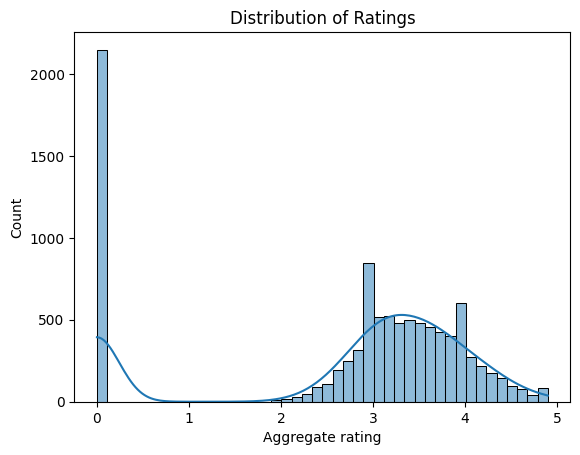

In [13]:
sns.histplot(data['Aggregate rating'], kde=True)
plt.title('Distribution of Ratings')
plt.show()

In [14]:
cuisine_rating_df = cuisine_rating.reset_index()
cuisine_rating_df.columns = ['Cuisine', 'Average Rating']

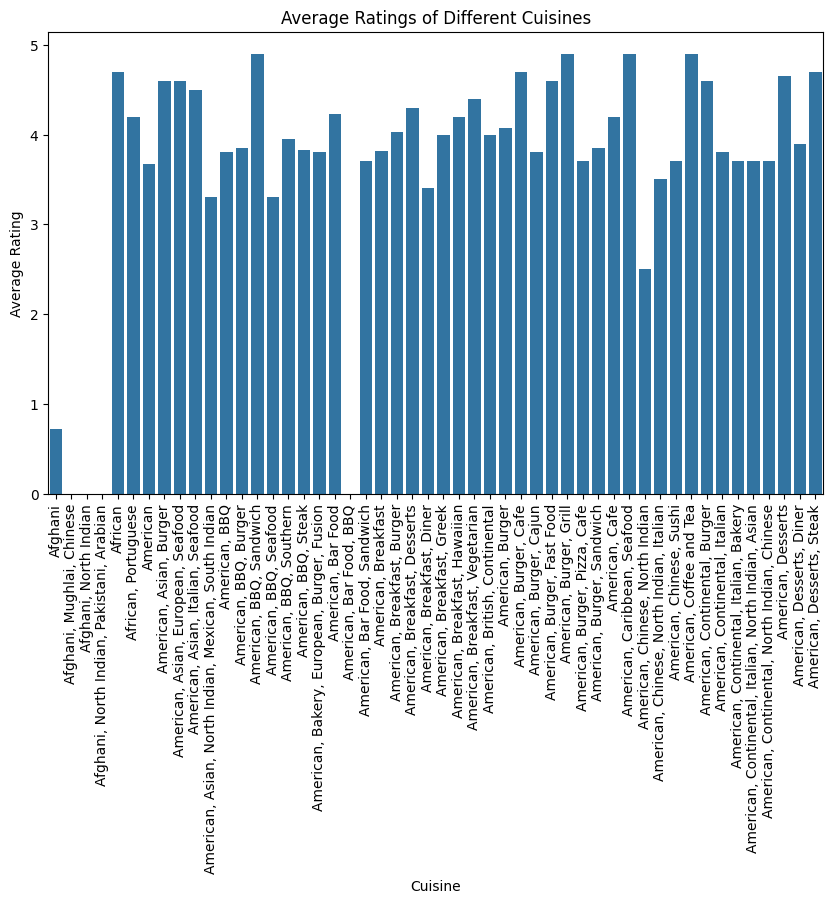

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cuisine', y='Average Rating', data=cuisine_rating_df.head(50))
plt.xticks(rotation=90)
plt.title('Average Ratings of Different Cuisines')
plt.show()

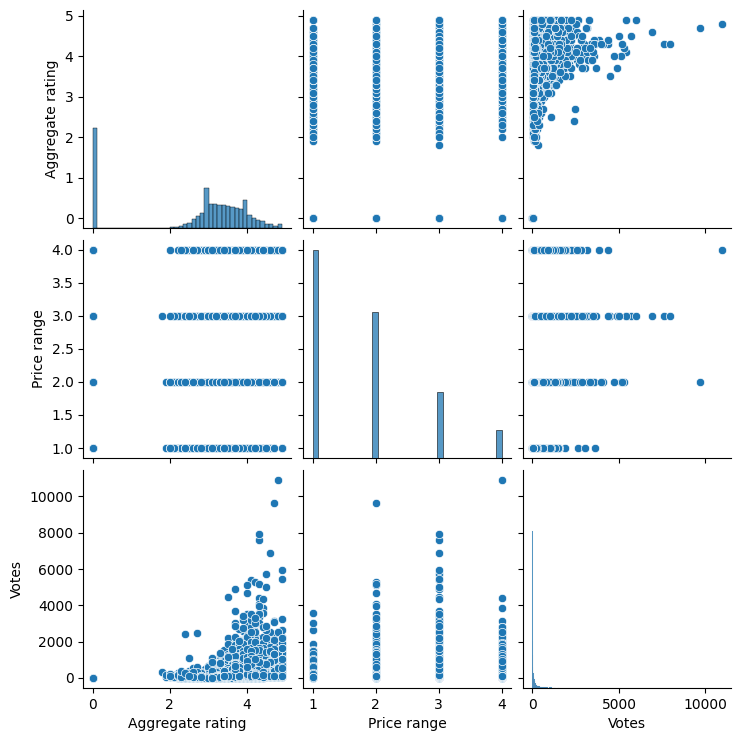

In [16]:
sns.pairplot(data, vars=['Aggregate rating', 'Price range', 'Votes'])
plt.show()